# Introduction

![Mobile.jpg](assets/Mobile.jpg)

*Buying a used smartphone can provide a great deal on a slightly older model as long as you are willing to forego the latest features.*

*Second, you need to ensure everything is working correctly. The most important thing to keep in mind when looking for a used smartphone is to research the current market prices so that you can get the best deal possible.*

*Research for the Right Price*

*You can do this by checking websites like Flipkart and Amazon to see how much people are selling the same smartphone for. You will come across across listings, but there are a few things to note:*

**In this notebook, I tried the prediction model for used Mobile Phones by compariong 6 Regression Models, Visualizing their scores on table and then a Prediction to a Genuine Price**

# Importing

In [485]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns #visuilization of data ploting
import warnings
warnings.simplefilter('ignore', category=FutureWarning) #suppress the annoying warnings of function deprecation in future

In [487]:
df=pd.read_csv('used_device_data.csv') #read the csv as dataframe(2d-array)

# Data Outline

In [488]:
# df.head() #print the first 5 rows
df.tail() #print the last 5 records

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [489]:
df.info() #info about data in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [490]:
df.describe() #gives the detail about the statistical data of the dataset

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# Data Preprocessing

**1) Find the columns which include NaN**

In [491]:
# df.isnull() #will work on each row and result true or false
df.isnull().sum() #count if it is true

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**2) Drop the rows which include NaN**

In [492]:
df=df.dropna()

**3) Find the duplicated rows**

In [493]:
duplicated_rows=df[df.duplicated()] #df.duplicated(columns based on which rows are compared default all) returns indexed
print(f'No of Duplicated Rows Present in the dataset: {duplicated_rows.shape[0]}') #shape gives size of 2d array

No of Duplicated Rows Present in the dataset: 0


**4) Find the numeric columns**

In [494]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O'] #picking numerical data only
# num_feature=[df.select_dtypes(include='O')]
print(num_feature)

['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


# Exploratory Data Analysis (EDA)

**1) Boxplot of the numeric columns(for outliers)** 

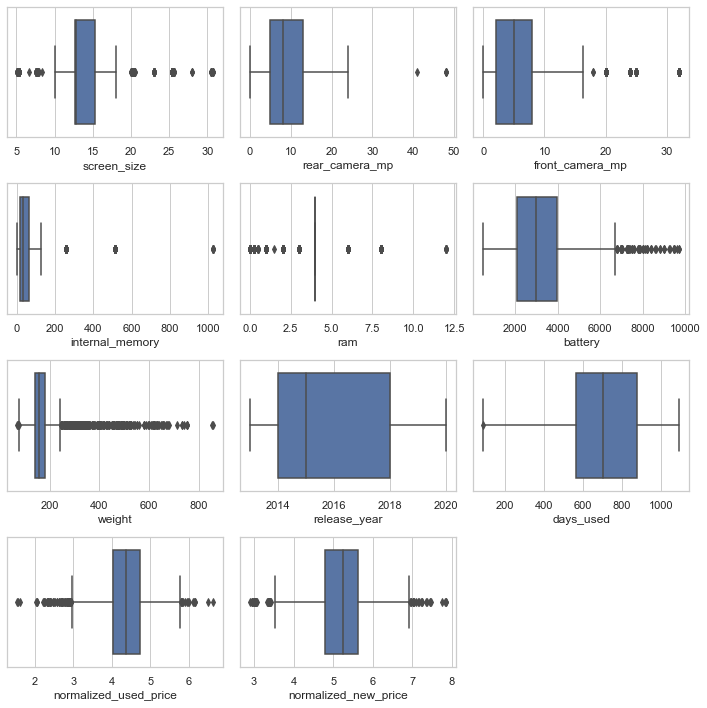

In [495]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1) #rows columns
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout() #automatic adjust paddings
plt.show()

There seem to be some outliers in some numeric columns.

**2) Kernel density estimation by Kdeplot of the numeric columns** (to Decide which method can be used for correlation calc)

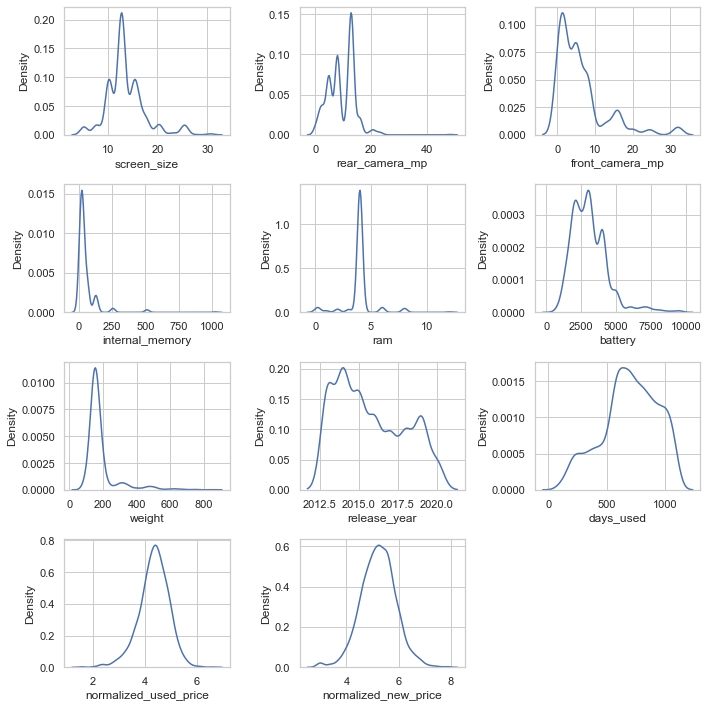

In [496]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

There seem to be non-normal distributions in the numeric columns except in 'normalized_used_price' and 'normalized_new_price'.

**3) Kernel density estimation by Kdeplot of the numeric columns and 'normalized_used_price'**

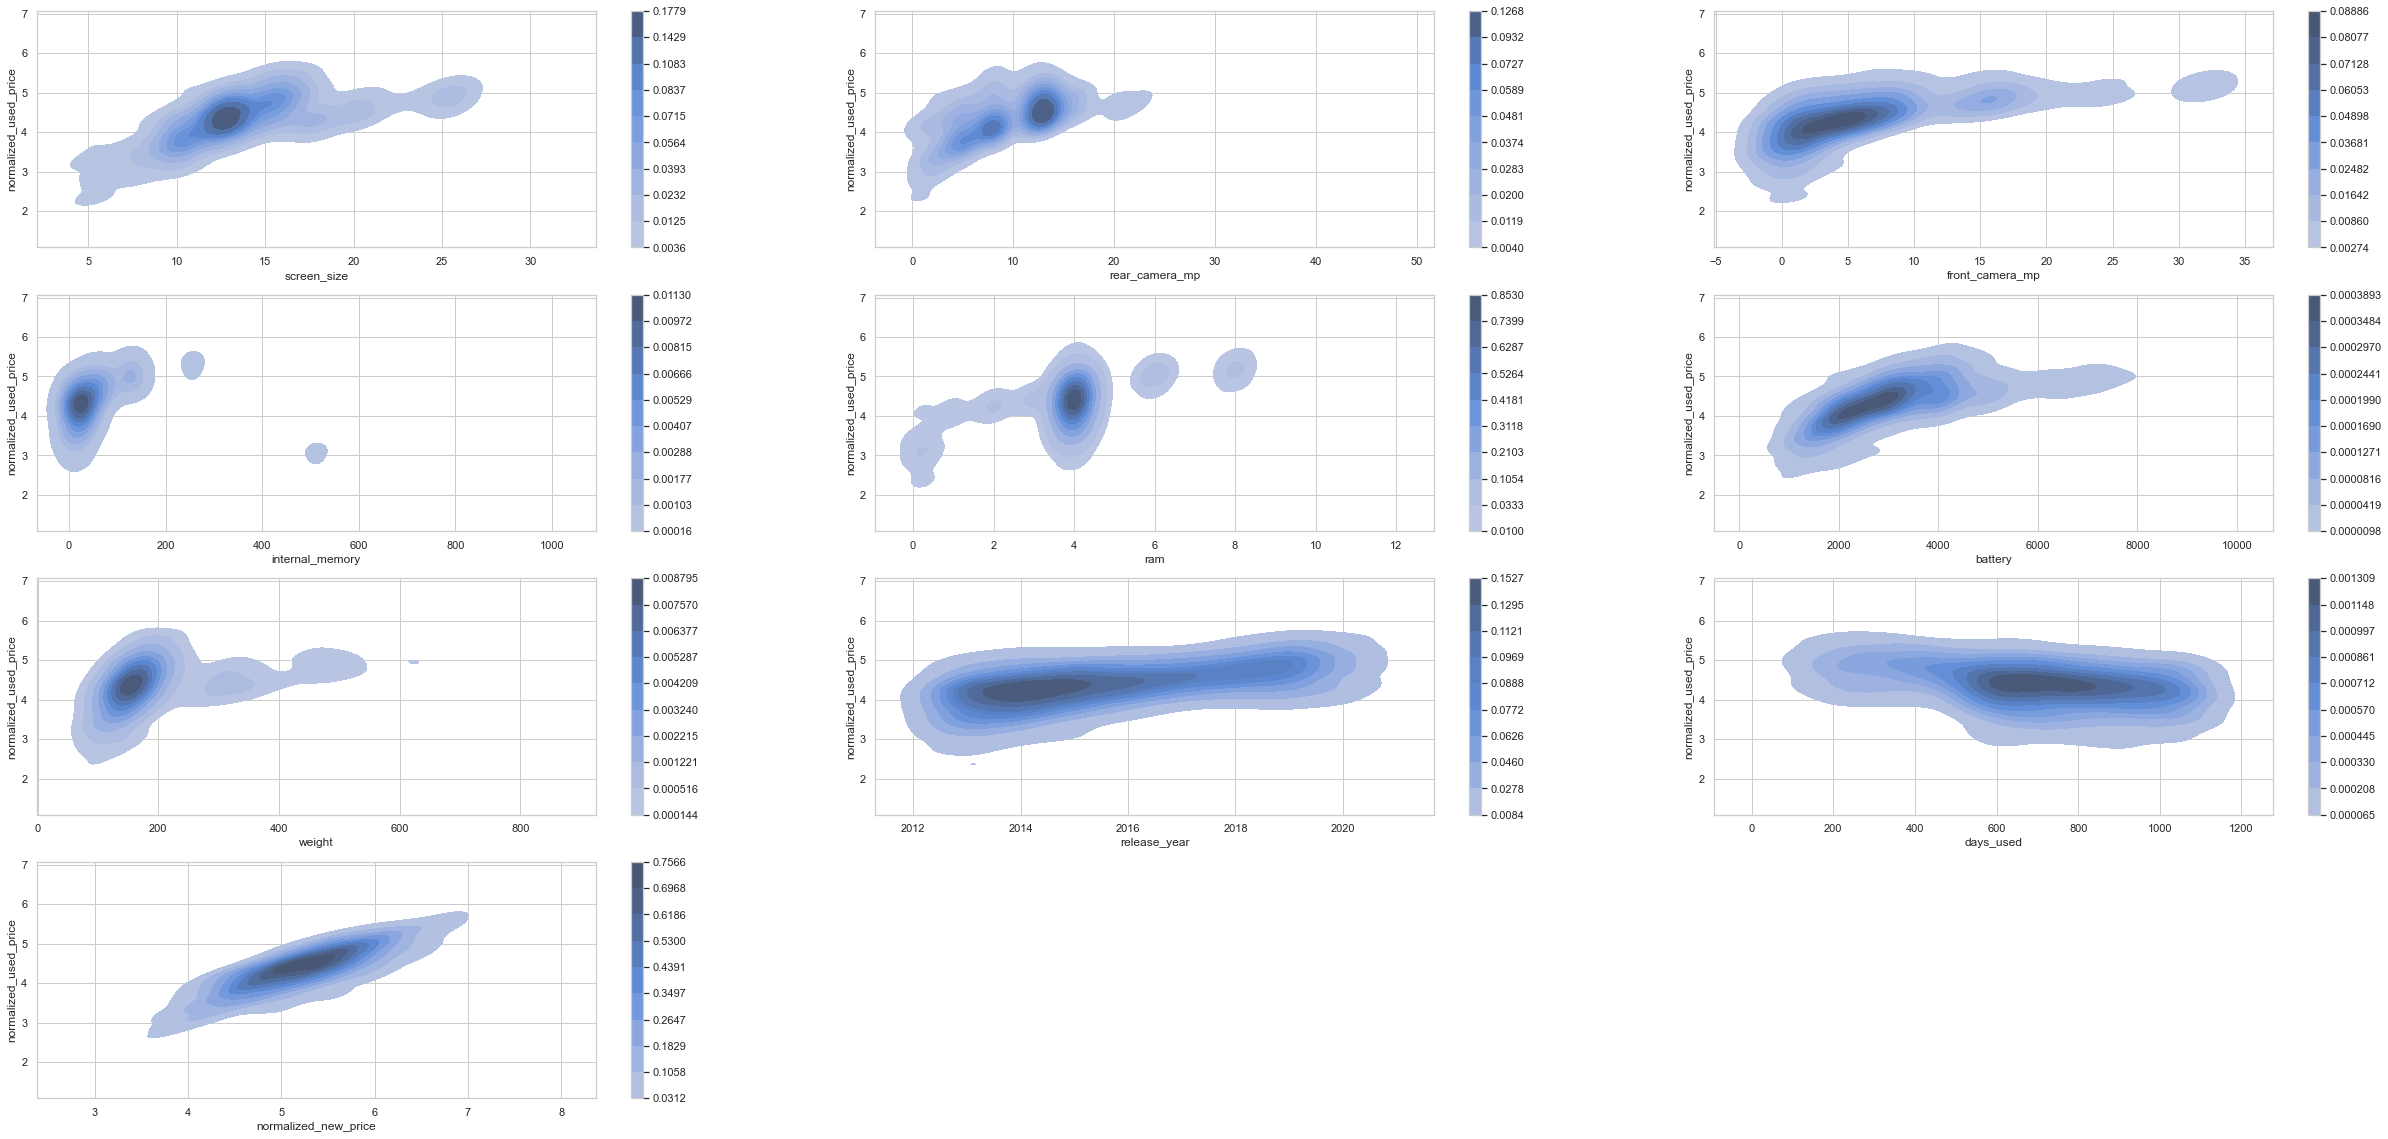

In [497]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(24, 20))
fig.subplots_adjust(right=1.5)

plt.subplot(4, 3, 1)
sns.kdeplot(df['screen_size'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 2)
sns.kdeplot(df['rear_camera_mp'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 3)
sns.kdeplot(df['front_camera_mp'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 4)
sns.kdeplot(df['internal_memory'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 5)
sns.kdeplot(df['ram'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 6)
sns.kdeplot(df['battery'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 7)
sns.kdeplot(df['weight'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 8)
sns.kdeplot(df['release_year'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 9)
sns.kdeplot(df['days_used'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 10)
sns.kdeplot(df['normalized_new_price'],df['normalized_used_price'],fill=True,cbar=True)

plt.show()

There seem to be some concentration between function, for example screen_size, rear_camera_mp, front_camera_mp, internal_memory, ram and weight, and 'normalizeed_used_price'

**4) Correlation between the numeric columns and 'normalized_used_price'** Tells how strongly two entities correlate

In [498]:
# 1.Pearson ND
# 2.Spearman Any Distribution
# 3.Point-biserial ND
# 4.Cramer Any Distribution
# 5.Kendall Any Distribution
# Our Both Entities are not normalized so 2,4,5 are selected
# but standard codes are available only for 1,2,5
# so 2,5 will do

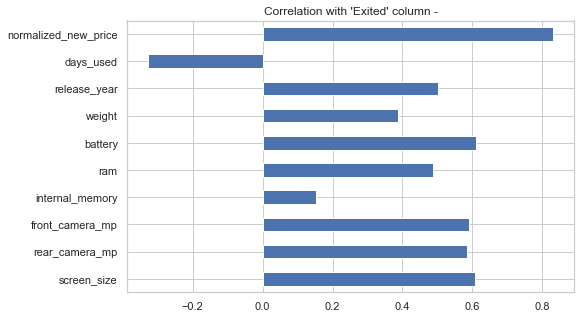

In [499]:
#spearman
plt.figure(figsize=(8, 5))
X = df.drop('normalized_used_price', axis=1) # axis=1(column)|0(row),dropped UsedPrice because we need to compare with it
X.corr(method='spearman')  
X.corrwith(df['normalized_used_price']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

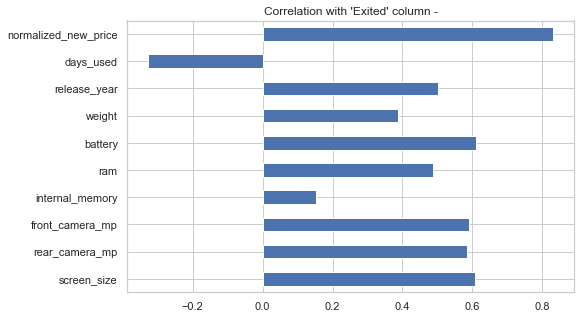

In [500]:
#kendall
plt.figure(figsize=(8, 5))
X = df.drop('normalized_used_price', axis=1) # axis=1(column)|0(row),dropped UsedPrice because we need to compare with it
X.corr(method='kendall')  
X.corrwith(df['normalized_used_price']).plot(kind='barh', title="Correlation with 'Exited' column -")
plt.show()

In numeric columns, 'normalized_used_price' have strong correlation with
* normalized_new_price >0.8
* battery >0.6
* screen_size >0.6
* front_camera_mp >0.5
* rear_camera_mp >0.5

# Feature Engineering

**1) Remove outliers**

In [501]:
for i in num_feature:
    q1= df[i].quantile(0.997)
    df=df[df[i]<q1]

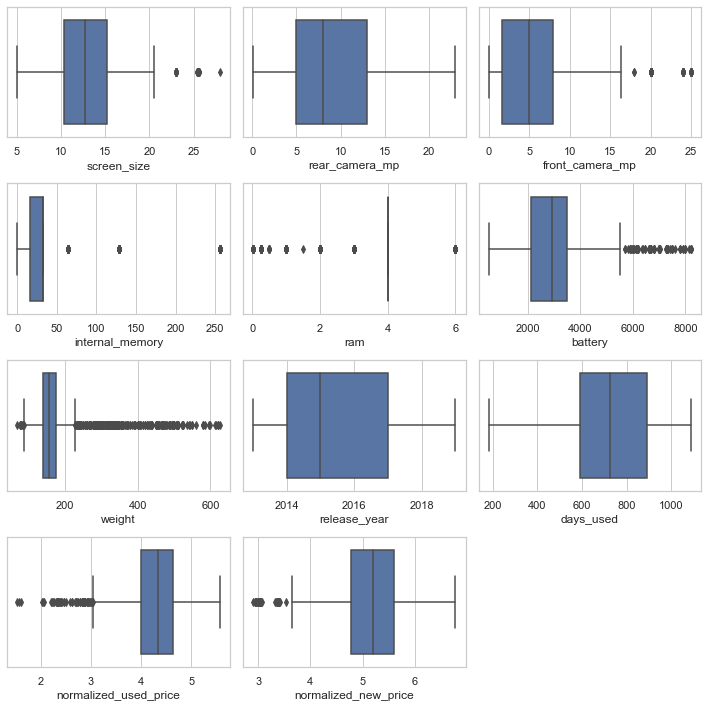

In [502]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

**2) Convert categorial columns to numeric**

In [503]:
df=pd.get_dummies(df) #converts categorical data to numerical

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 13 to 3447
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   screen_size              2883 non-null   float64
 1   rear_camera_mp           2883 non-null   float64
 2   front_camera_mp          2883 non-null   float64
 3   internal_memory          2883 non-null   float64
 4   ram                      2883 non-null   float64
 5   battery                  2883 non-null   float64
 6   weight                   2883 non-null   float64
 7   release_year             2883 non-null   int64  
 8   days_used                2883 non-null   int64  
 9   normalized_used_price    2883 non-null   float64
 10  normalized_new_price     2883 non-null   float64
 11  device_brand_Acer        2883 non-null   uint8  
 12  device_brand_Alcatel     2883 non-null   uint8  
 13  device_brand_Apple       2883 non-null   uint8  
 14  device_brand_Asus      

**3) Distplot and Q_Q plot of num_feature**

Q-Q plot shows the distribution of the data against the expected normal distribution. For normally distributed data, observations should lie approximately on a straight line. If the data is non-normal, the points form a curve that deviates markedly from a straight line. Possible outliers are points at the ends of the line, distanced from the bulk of the observations.

reference:
* "Normal probability (Q-Q) plot" by Analyze-it (https://analyse-it.com/docs/user-guide/distribution/continuous/normal-probability-plot)

In [505]:
import scipy.stats as stats
def diagnostic_plot(df, col):
    fig = plt.figure(figsize=(9, 4))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.show()

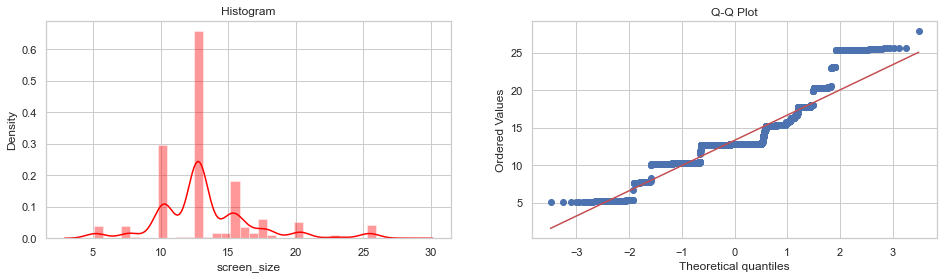

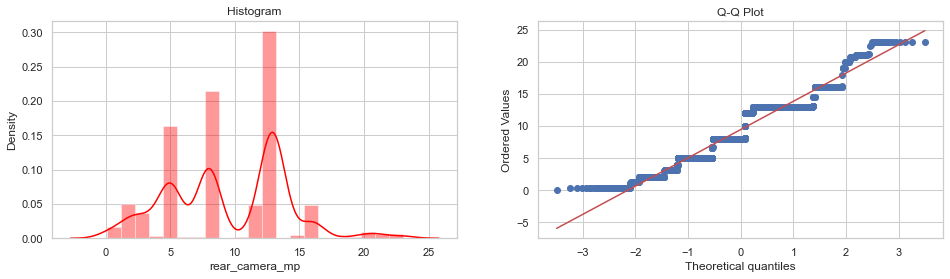

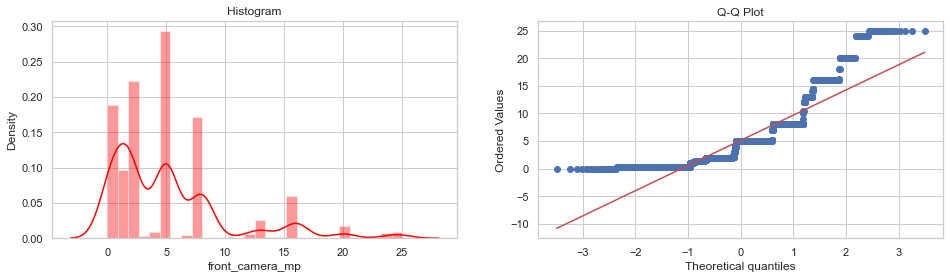

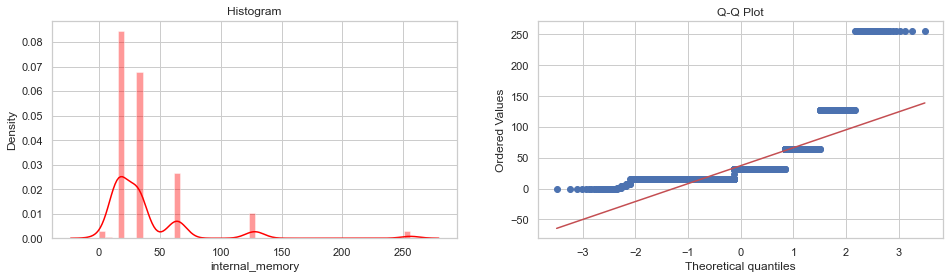

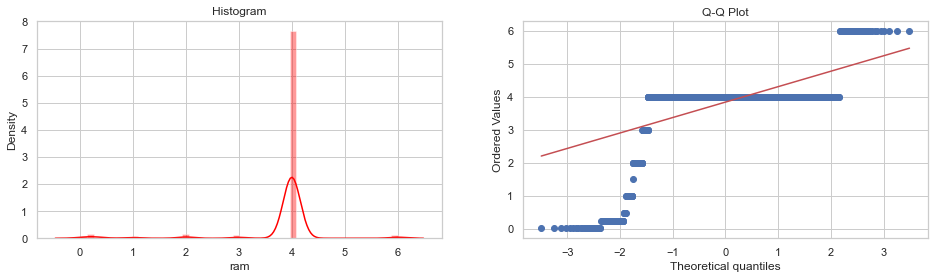

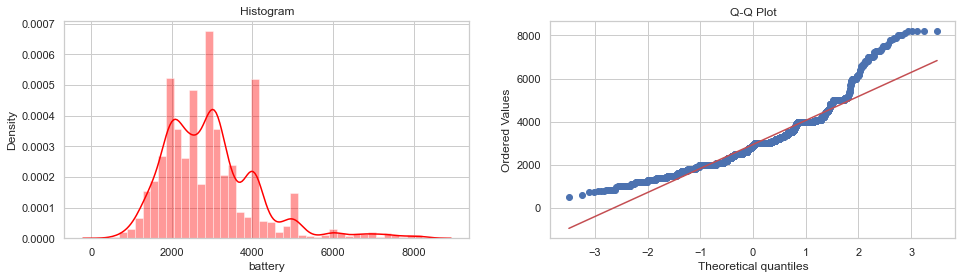

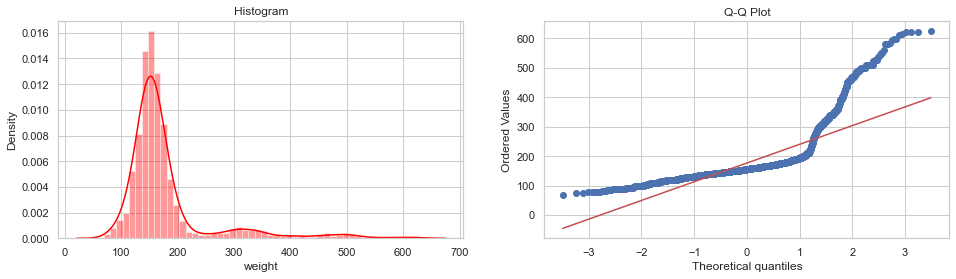

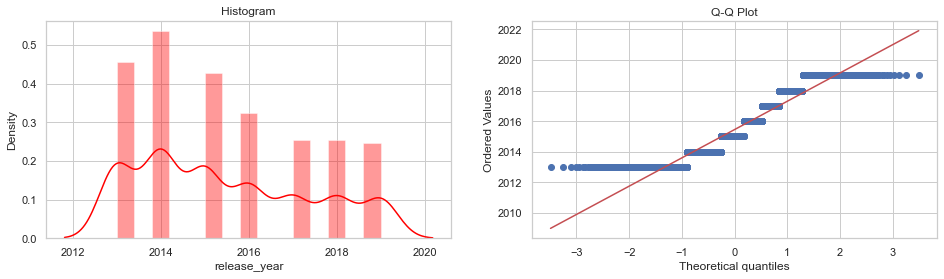

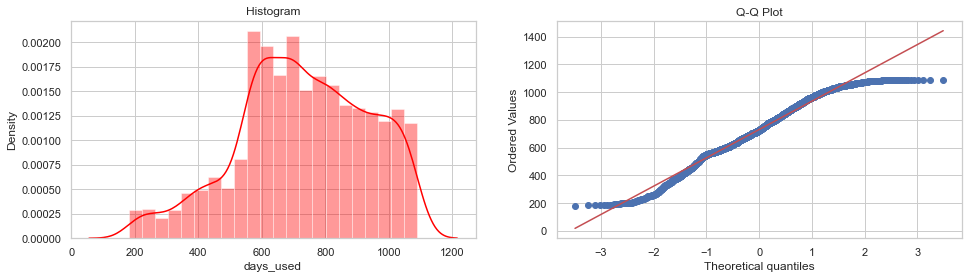

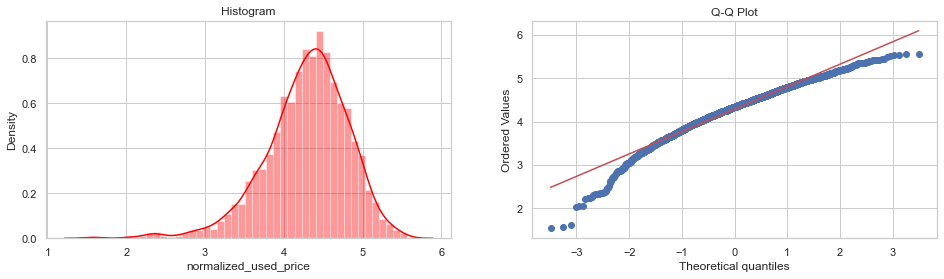

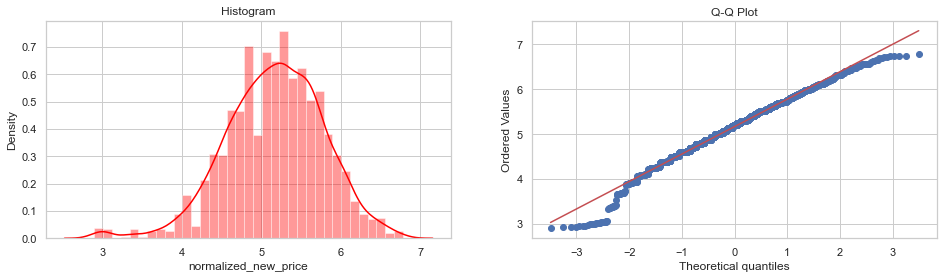

In [506]:
for feature in df[num_feature]:
    diagnostic_plot(df, feature)

There are non-normal distributions in the numeric columns except in 'normalized_used_price' and 'normalized_new_price'. They should be normalized.

# Data Splitting & Normalizing the data

**1) Data split to training and testing data**

In [659]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
x = df.drop('normalized_used_price', axis= 1)
y=df['normalized_used_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 42)

**2) Normalization**

In [660]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [661]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2018, 51)
X_test: (865, 51)
Y_train: (2018,)
Y_test: (865,)


# Machine  Learning Models

**1) Ridge Regression**

In [662]:
MAE=[]
MSE=[]
RMSE=[]
R2=[]
Price=[]

In [663]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from math import sqrt

In [664]:
ridge=Ridge()

In [665]:
parameter={'alpha':[0.5,1,2,3,4,5,10,20,30,40,50]}
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [666]:
print(ridgecv.best_params_)

{'alpha': 0.5}


In [667]:
ridge_pred=ridgecv.predict(x_test)

In [668]:
R2.insert(0,metrics.r2_score(ridge_pred,y_test))
MAE.insert(0,metrics.mean_absolute_error(ridge_pred,y_test))
MSE.insert(0,metrics.mean_squared_error(ridge_pred,y_test))
RMSE.insert(0,sqrt(metrics.mean_absolute_error(ridge_pred,y_test)))
Price.insert(0,ridge_pred)

In [669]:
# print(MAE,MSE,RMSE,R2,Price)

**2) KNN Regressor**

In [670]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [671]:
parameter={"n_neighbors":[1,2,3,4,5,10,20,50]}

In [672]:
knncv=GridSearchCV(knn,parameter,scoring='neg_mean_squared_error',cv=5)
knncv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [673]:
print(knncv.best_params_)

{'n_neighbors': 4}


In [674]:
knn_pred=knncv.predict(x_test)

In [675]:
R2.insert(1,metrics.r2_score(knn_pred,y_test))
MAE.insert(1,metrics.mean_absolute_error(knn_pred,y_test))
MSE.insert(1,metrics.mean_squared_error(knn_pred,y_test))
RMSE.insert(1,sqrt(metrics.mean_absolute_error(knn_pred,y_test)))
Price.insert(1,knn_pred)

In [676]:
# print(MAE,MSE,RMSE,R2,Price)

**3) Linear Regression**

In [677]:
from sklearn.linear_model import LinearRegression

In [678]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [679]:
reg_pred=regressor.predict(x_test)

In [680]:
R2.insert(2,metrics.r2_score(reg_pred,y_test))
MAE.insert(2,metrics.mean_absolute_error(reg_pred,y_test))
MSE.insert(2,metrics.mean_squared_error(reg_pred,y_test))
RMSE.insert(2,sqrt(metrics.mean_absolute_error(reg_pred,y_test)))
Price.insert(2,reg_pred)

In [681]:
# print(MAE,MSE,RMSE,R2,Price)

**4) Decision Tree Regressor**

In [682]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

In [683]:
parameters={'max_depth': [11],#default : none
 'max_features': ['sqrt'],#default : none
 'max_leaf_nodes': [70],#default : none
 'min_samples_leaf': [5],#default : 1
 'min_weight_fraction_leaf': [0.1],#default : 0
 'splitter': ['best']}#default : 'best'

In [684]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.201 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.118 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.169 total time=   0.0s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [11], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [70], 'min_samples_leaf': [5],
                         'min_weight_fraction_leaf': [0.1],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=3)

In [685]:
tuning_pred=tuning_model.predict(x_test)

In [686]:
R2.insert(3,metrics.r2_score(tuning_pred,y_test))
MAE.insert(3,metrics.mean_absolute_error(tuning_pred,y_test))
MSE.insert(3,metrics.mean_squared_error(tuning_pred,y_test))
RMSE.insert(3,sqrt(metrics.mean_absolute_error(tuning_pred,y_test)))
Price.insert(3,tuning_pred)

In [687]:
# print(MAE,MSE,RMSE,R2,Price)

**5) Lasso Regression**

In [688]:
from sklearn.linear_model import Lasso

In [689]:
lasso=Lasso()

In [690]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [691]:
print(lassocv.best_params_)

{'alpha': 0.0001}


In [692]:
lasso_pred=lassocv.predict(x_test)

In [693]:
R2.insert(4,metrics.r2_score(lasso_pred,y_test))
MAE.insert(4,metrics.mean_absolute_error(lasso_pred,y_test))
MSE.insert(4,metrics.mean_squared_error(lasso_pred,y_test))
RMSE.insert(4,sqrt(metrics.mean_absolute_error(lasso_pred,y_test)))
Price.insert(4,lasso_pred)

In [694]:
# print(MAE,MSE,RMSE,R2,Price)
print(lasso_pred)

[5.17897975 4.31099824 4.36611865 3.71701599 3.44832269 3.53875791
 3.88049677 3.81506413 4.25146687 4.90045561 4.72457856 4.48069234
 3.97188486 5.46320178 4.82481622 4.67958099 4.04556959 4.45585309
 3.83870324 4.80220679 4.06481741 4.99362796 4.73837467 4.58723634
 4.59535131 4.29409523 5.13123539 4.36729547 3.92589345 3.7789047
 3.84825802 4.05827605 4.40182933 5.0907607  4.37995599 4.05902955
 3.89932315 4.67997998 4.90183197 4.54881748 3.70286254 4.37266213
 4.12215443 3.6422817  3.68516891 4.95965942 5.16512298 3.30662836
 4.72068805 4.66756409 3.66377224 4.04010776 4.11771359 4.51385606
 4.97824724 4.36641549 4.62851804 5.25968539 3.87085335 5.01191385
 4.7593708  4.26709764 4.11326126 4.77706311 4.35045308 4.76017366
 3.4826571  4.83454565 4.10696268 4.38756996 4.42486476 4.73047665
 3.57040272 3.62754    3.82037772 4.10777638 4.95443019 4.81050875
 5.17149864 4.28877227 4.47693715 4.66945364 4.81851824 4.46071588
 3.9365022  3.89245576 4.09657271 3.0833663  4.00206159 4.49828

**6) Random Forest Classification**

In [695]:
from sklearn.ensemble import RandomForestRegressor

In [696]:
rf=RandomForestRegressor()

In [697]:
n_estimators = [5,20,50,100]#default=100 # number of trees in the random forest
max_features = ['auto', 'sqrt']#default=1.0 # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # default=none # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # default=2 # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] #default=1 # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] #default=true # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [698]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [699]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [700]:
y_predrf=rf_random.predict(x_test)

In [701]:
R2.insert(5,metrics.r2_score(y_predrf,y_test))
MAE.insert(5,metrics.mean_absolute_error(y_predrf,y_test))
MSE.insert(5,metrics.mean_squared_error(y_predrf,y_test))
RMSE.insert(5,sqrt(metrics.mean_absolute_error(y_predrf,y_test)))
Price.insert(5,y_predrf)

In [702]:
# print(MAE,MSE,RMSE,R2,Price)

**7) Compare 6 models by Different Metrics**

In [703]:
models = ['Linear Regression', 'Ridge Regression','K-Neighbors Regression','Decision Tree Regressor','Lasso Regression',"Random Forest Classifier"]
score=['R2','MAE','MSE','RMSE','Price']
scores = [R2,MAE,MSE,RMSE,Price]
table=pd.DataFrame(scores, columns=models,index=score).sort_values(by=['R2'], ascending=False,axis=1)
display(table[0:4].style.highlight_min(color = 'red', axis = 1).highlight_max(color = 'lightgreen', axis = 1))
print("For R2, Green is good(greatest)\nFor Remaining Metrics, Red is good(smallest)")

,Lasso Regression,K-Neighbors Regression,Linear Regression,Random Forest Classifier,Ridge Regression,Decision Tree Regressor
R2,0.778288,0.777785,0.776219,0.758269,0.601572,-0.152318
MAE,0.175787,0.176442,0.176329,0.177123,0.216027,0.283104
MSE,0.050094,0.050475,0.050439,0.050401,0.079560,0.140016
RMSE,0.419270,0.420050,0.419915,0.420860,0.464787,0.532075


For R2, Green is good(greatest)
For Remaining Metrics, Red is good(smallest)


In [704]:
print(f"Estimated Price For Test Case:",table.iloc[4][0])

Estimated Price For Test Case: [5.17897975 4.31099824 4.36611865 3.71701599 3.44832269 3.53875791
 3.88049677 3.81506413 4.25146687 4.90045561 4.72457856 4.48069234
 3.97188486 5.46320178 4.82481622 4.67958099 4.04556959 4.45585309
 3.83870324 4.80220679 4.06481741 4.99362796 4.73837467 4.58723634
 4.59535131 4.29409523 5.13123539 4.36729547 3.92589345 3.7789047
 3.84825802 4.05827605 4.40182933 5.0907607  4.37995599 4.05902955
 3.89932315 4.67997998 4.90183197 4.54881748 3.70286254 4.37266213
 4.12215443 3.6422817  3.68516891 4.95965942 5.16512298 3.30662836
 4.72068805 4.66756409 3.66377224 4.04010776 4.11771359 4.51385606
 4.97824724 4.36641549 4.62851804 5.25968539 3.87085335 5.01191385
 4.7593708  4.26709764 4.11326126 4.77706311 4.35045308 4.76017366
 3.4826571  4.83454565 4.10696268 4.38756996 4.42486476 4.73047665
 3.57040272 3.62754    3.82037772 4.10777638 4.95443019 4.81050875
 5.17149864 4.28877227 4.47693715 4.66945364 4.81851824 4.46071588
 3.9365022  3.89245576 4.0965727

# Now We will Test on test.csv

In [708]:
test=pd.read_csv("test.csv")
sc=MinMaxScaler()
test=sc.fit_transform(test)
Value=lassocv.predict(test)
print(f"Estimated Price For Test Case:",(Value))

Estimated Price For Test Case: [2.75151969]


### *Note: In the Dataset there is no information to revert back these normalised price to orginal one* 

### But, the thing is we can actually pick some phones having same or similiar specs to our data and check for its current market prices then we can give a rough estimate of original price